In [92]:
#submissions vs score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize 

BASE_DIR = "/Users/adarsh_23/CNS/Envisioning-Kaggle-main/Filtered"


In [93]:
submissions_df = pd.read_csv(BASE_DIR+'/Submissions.csv', infer_datetime_format=True)
submissions_df

,Unnamed: 0,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,10938022,27177301,1107630.0,8805846,99083601.0,06/23/2022,06/23/2022,False,0.00017,0.000178,0.00016,0.000168
1,10938023,27188747,1107630.0,8805846,99083601.0,06/24/2022,06/24/2022,False,0.00017,0.000178,0.00016,0.000168
2,10938286,27271946,3045170.0,8806499,99739796.0,07/01/2022,07/01/2022,False,0.64465,0.644654,0.61432,0.614323
3,10938287,27425049,3215961.0,8806782,100725048.0,07/13/2022,07/13/2022,False,0.56559,0.565597,0.51279,0.512796
4,10938288,27499221,3215961.0,8806782,101119599.0,07/18/2022,07/18/2022,False,0.66756,0.667563,0.64493,0.644932
...,...,...,...,...,...,...,...,...,...,...,...,...
40405,11437793,28090802,1422008.0,9146819,105567395.0,09/13/2022,09/13/2022,False,0.74504,0.745045,0.71778,0.717784
40406,11437794,28090958,1422008.0,9146819,105568906.0,09/13/2022,09/13/2022,False,0.74504,0.745045,0.71778,0.717784
40407,11441273,28126126,11605420.0,9156781,105816662.0,09/16/2022,09/16/2022,False,NaN,NaN,NaN,NaN
40408,11441274,28126165,11605420.0,9156781,105817027.0,09/16/2022,09/16/2022,False,0.54423,0.544232,0.44717,0.447175


In [94]:
#were there any after the deadline?
print(submissions_df.IsAfterDeadline.unique())

[False  True]


In [95]:
#remove any submissions after deadline

submissions_df = submissions_df[submissions_df.IsAfterDeadline==False]
submissions_df

,Unnamed: 0,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,10938022,27177301,1107630.0,8805846,99083601.0,06/23/2022,06/23/2022,False,0.00017,0.000178,0.00016,0.000168
1,10938023,27188747,1107630.0,8805846,99083601.0,06/24/2022,06/24/2022,False,0.00017,0.000178,0.00016,0.000168
2,10938286,27271946,3045170.0,8806499,99739796.0,07/01/2022,07/01/2022,False,0.64465,0.644654,0.61432,0.614323
3,10938287,27425049,3215961.0,8806782,100725048.0,07/13/2022,07/13/2022,False,0.56559,0.565597,0.51279,0.512796
4,10938288,27499221,3215961.0,8806782,101119599.0,07/18/2022,07/18/2022,False,0.66756,0.667563,0.64493,0.644932
...,...,...,...,...,...,...,...,...,...,...,...,...
40405,11437793,28090802,1422008.0,9146819,105567395.0,09/13/2022,09/13/2022,False,0.74504,0.745045,0.71778,0.717784
40406,11437794,28090958,1422008.0,9146819,105568906.0,09/13/2022,09/13/2022,False,0.74504,0.745045,0.71778,0.717784
40407,11441273,28126126,11605420.0,9156781,105816662.0,09/16/2022,09/16/2022,False,NaN,NaN,NaN,NaN
40408,11441274,28126165,11605420.0,9156781,105817027.0,09/16/2022,09/16/2022,False,0.54423,0.544232,0.44717,0.447175


In [96]:
#transform data 

#need for each team #submissions and max private leaderboard score

grouped_submissions = submissions_df.groupby("TeamId")

grouped_submissions = pd.DataFrame(grouped_submissions.max("PrivateScoreLeaderboardDisplay"))

In [97]:
grouped_submissions.sort_values(by=['PrivateScoreLeaderboardDisplay'],ascending=False).head(15)

,Unnamed: 0,Id,SubmittedUserId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
TeamId,,,,,,,,,
8809559,11387090,28203370,8604895.0,106312435.0,False,0.82716,0.827166,0.83562,0.835625
8893081,11391517,28198390,1690820.0,106283407.0,False,0.83983,0.839835,0.83419,0.834195
8970242,11432925,28201997,1516970.0,106307598.0,False,0.82777,0.827776,0.83396,0.833967
8807737,11408184,28199019,518185.0,106276953.0,False,0.84178,0.841786,0.83393,0.833936
9015880,11353018,28199293,11300554.0,106293372.0,False,0.83960,0.839608,0.82857,0.828574
8807628,11354241,28196346,2909490.0,106273268.0,False,0.83441,0.834417,0.82595,0.825959
8928461,11392890,28194378,2293425.0,106262510.0,False,0.83709,0.837090,0.82549,0.825497
8946442,11343128,28200359,8171978.0,106300712.0,False,0.83324,0.833240,0.82538,0.825381
8885415,11408744,28195920,4240322.0,106270600.0,False,0.83156,0.831566,0.82335,0.823351


In [98]:
grouped_teams = submissions_df
grouped_teams["NumSubmissions"] = 1
grouped_teams = grouped_teams.groupby("TeamId").sum()
grouped_teams

/var/folders/hc/1stky0sd2_z9nqk66bk22rs80000gn/T/ipykernel_4694/1183672407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_teams["NumSubmissions"] = 1


,Unnamed: 0,Id,SubmittedUserId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision,NumSubmissions
TeamId,,,,,,,,,,
8800915,11275894,27162604,1132983.0,0.000000e+00,0,0.00017,0.000178,0.00016,0.000168,1
8805826,100132317,244724349,19195155.0,8.926968e+08,0,1.82343,1.823465,1.55985,1.559868,9
8805846,44692076,110551173,4430520.0,4.091555e+08,0,0.74538,0.745400,0.71810,0.718120,4
8805854,157044670,384535263,91520618.0,1.414573e+09,0,3.90662,3.906667,3.95664,3.956685,14
8805890,661319377,1621617676,628596620.0,5.963408e+09,0,33.36284,33.363083,31.50083,31.501106,59
...,...,...,...,...,...,...,...,...,...,...
9157791,136822674,338203106,139297428.0,1.274295e+09,0,8.71708,8.717120,8.23720,8.237264,12
9157841,159660571,394550513,28157374.0,1.486354e+09,0,4.74048,4.740546,3.97946,3.979531,14
9158096,11413218,28184746,9451626.0,1.062111e+08,0,0.66795,0.667952,0.56683,0.566832,1


In [99]:
teams = pd.read_csv('/Users/adarsh_23/CNS/Envisioning-Kaggle-main/Metadata/Teams.csv')
teams.head(2)

/var/folders/hc/1stky0sd2_z9nqk66bk22rs80000gn/T/ipykernel_4694/3998961237.py:1: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  teams = pd.read_csv('/Users/adarsh_23/CNS/Envisioning-Kaggle-main/Metadata/Teams.csv')


,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
0,496,2435,647.0,team1,NaN,05/04/2010,2192.0,2192.0,False,NaN,09/06/2018,59.0,83.0
1,497,2435,619.0,jonp,NaN,04/30/2010,2182.0,2182.0,False,3.0,07/15/2016,41.0,25.0


In [100]:
# Competition Id for Kaggle 2 - 34547
teams = teams[teams['CompetitionId']==34547]
teams.head(2)

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
5021857,8167181,34547,1095143.0,Addison Howard,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
5419113,8772660,34547,NaN,Competition Wizard Sample Submission Playground,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [101]:
teams.sort_values(by=['PrivateLeaderboardRank'],ascending=True).head(10)

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
5441904,8809559,34547,8604895.0,I need SegFormer,NaN,09/22/2022,28201344.0,28201344.0,False,1.0,09/23/2022,21.0,1.0
5440664,8807737,34547,518185.0,Victor Durnov,NaN,09/22/2022,28188836.0,28188836.0,False,1.0,09/23/2022,1.0,2.0
5494676,8893081,34547,1690820.0,Human Torus Team,NaN,09/22/2022,28198390.0,28198390.0,False,1.0,09/23/2022,3.0,3.0
5573146,9015880,34547,9820727.0,Rock,NaN,09/22/2022,28199042.0,28199042.0,False,1.0,09/23/2022,4.0,4.0
5440593,8807628,34547,2909490.0,Carno&Roc,NaN,09/22/2022,28155560.0,28196147.0,False,1.0,09/23/2022,6.0,5.0
5529306,8946442,34547,8171978.0,ZJUT_IAISRC&InnerVoice,NaN,09/22/2022,28200127.0,28200127.0,False,1.0,09/23/2022,8.0,6.0
5517734,8928461,34547,2293425.0,Q_takka,NaN,09/22/2022,28180306.0,28194378.0,False,1.0,09/23/2022,5.0,7.0
5544573,8970242,34547,1516970.0,Blablabla,NaN,09/22/2022,28198622.0,28187655.0,False,1.0,09/23/2022,20.0,8.0
5489830,8885415,34547,4240322.0,Clevert,NaN,09/22/2022,28184721.0,28184721.0,False,1.0,09/23/2022,13.0,9.0
5558936,8993571,34547,9250575.0,HCMUT_Alumni,NaN,09/22/2022,28191185.0,28191185.0,False,1.0,09/23/2022,2.0,10.0


In [102]:
team_ids = [8809559,8807737,8893081] # Winning 3 teams

In [103]:
grouped_teams_df = pd.DataFrame(grouped_teams)
grouped_teams_df.NumSubmissions

TeamId
8800915     1
8805826     9
8805846     4
8805854    14
8805890    59
           ..
9157791    12
9157841    14
9158096     1
9158316     4
9158565    10
Name: NumSubmissions, Length: 1175, dtype: int64

In [104]:
teams[teams['Id'].isin(team_ids)]

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
5440664,8807737,34547,518185.0,Victor Durnov,NaN,09/22/2022,28188836.0,28188836.0,False,1.0,09/23/2022,1.0,2.0
5441904,8809559,34547,8604895.0,I need SegFormer,NaN,09/22/2022,28201344.0,28201344.0,False,1.0,09/23/2022,21.0,1.0
5494676,8893081,34547,1690820.0,Human Torus Team,NaN,09/22/2022,28198390.0,28198390.0,False,1.0,09/23/2022,3.0,3.0


In [105]:
df_to_plot = pd.DataFrame()
df_to_plot["NumSubmissions"] = grouped_teams_df.NumSubmissions
df_to_plot["HighScores"] = grouped_submissions.PrivateScoreLeaderboardDisplay
df_to_plot.to_csv("df_to_plot.csv", index=False)
df_to_plot_v2 = pd.read_csv('df_to_plot.csv')
df_to_plot_v2

,NumSubmissions,HighScores
0,1,0.00016
1,9,0.41421
2,4,0.71778
3,14,0.71778
4,59,0.65038
...,...,...
1170,12,0.71606
1171,14,0.48335
1172,1,0.56683
1173,4,0.79051


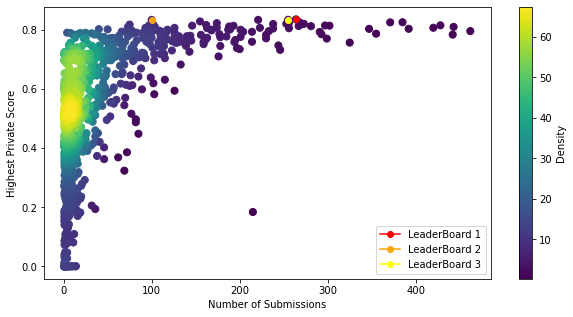

In [106]:
# identify data
x = df_to_plot_v2["NumSubmissions"]
y = df_to_plot_v2["HighScores"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(10,5))
#plt.figure(figsize=(10, 5))
ax.scatter(x, y, c=z, s=50)
ax.plot(264, 0.83562,'red',marker="o", label='LeaderBoard 1')
ax.plot(100, 0.83393,'orange',marker="o", label='LeaderBoard 2')
ax.plot(255, 0.83266,'yellow',marker="o", label='LeaderBoard 3')
ax.legend()
#plt.plot(255, 0.83266,'yellow',marker="X", label='Scientific Winner 1')
#plt.plot(255, 0.83266,'yellow',marker="X", label='Scientific Winner 2')
#plt.plot(255, 0.83266,'yellow',marker="X", label='Diversity Winner')
#0.83266
#plt.xlim([0, 180])
ax.set_xlabel('Number of Submissions')
#plt.ylim([0, 150])
ax.set_ylabel('Highest Private Score')
#plt.title('Number of Submissions vs. Private Score')
norm = Normalize(vmin = np.min(z)*2000, vmax = np.max(z)*2000)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
plt.savefig('updatedheatmap.png')
plt.savefig('updatedheatmap.svg')
#plt.savefig('Number of Submissions vs Private Score.png')
#plt.savefig('Number of Submissions vs Private Score.svg')
plt.show()


In [107]:
len(y) # Confirm we have 1175 teams

1175

In [ ]:
# End